# Import

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import os, sys, warnings
warnings.filterwarnings("ignore")
sys.path.append('..')

from Class.Plotter import *

# Inputs

In [2]:
targets = ['Cases']
target = 'Cases'
result_folder =  '../results/TFT_baseline' # '../results_cleaned_moving_averaged/short' # 
figPath = os.path.join(result_folder, 'figures')
results = pd.read_csv(os.path.join(figPath, 'predictions.csv'))
results['Date'] = pd.to_datetime(results['Date'])
results.head()

,FIPS,TimeFromStart,Predicted_Cases,Cases,Date,split
0,10001,13,7.0,0.0,2020-03-13,train
1,10003,13,17.0,0.0,2020-03-13,train
2,10005,13,9.0,0.0,2020-03-13,train
3,1001,13,3.0,0.0,2020-03-13,train
4,1003,13,10.0,0.0,2020-03-13,train


In [3]:
support_path = '../../dataset_raw/Support files/'
population_filepath = os.path.join(support_path, 'Population.csv')
population = pd.read_csv(population_filepath)
sorted_fips = population.sort_values(by=['POPESTIMATE'], ascending=False)['FIPS'].values

In [4]:
test = results[results['split']=='test']
train = results[results['split']=='train']

# Plotter

In [5]:
plotter = PlotResults(figPath, targets)

## Population cut

### Test results

In [ ]:
# figures = plotter.summed_plot(results_top_500[results_top_500['split']=='test'], type='Test', save=True)
# for index, target in enumerate(targets):
#     figures[index].savefig(os.path.join(figPath, f'{target}_top_500_Test.jpg') , dpi=DPI)

# figures = plotter.summed_plot(results_bottom_500[results_bottom_500['split']=='test'], type='Test', save=True)
# for index, target in enumerate(targets):
#     figures[index].savefig(os.path.join(figPath, f'{target}_bottom_500_Test.jpg') , dpi=DPI)

# Counties

## Select 

In [6]:
top = [6073, 17031, 42101, 36047, 12086, 11001, 6037]
np.random.seed(7)
top = np.random.choice(sorted_fips[:100], size=3, replace=False)
bottom = np.random.choice(sorted_fips[100:], size=3, replace=False)

selected_fips = np.concatenate((top, bottom), axis=None)
selected_population = []
for fips in selected_fips:
    selected_population.append(population[population['FIPS']==fips]['POPESTIMATE'].values[0])
selected_population

selected_fips

array([49035, 12057, 41051, 51025, 37199, 26129], dtype=int64)

## Subplot

0: Utah, Salt Lake (1164.3K)
1: Florida, Hillsborough (1493.5K)
2: Oregon, Multnomah (815.2K)
3: Virginia, Brunswick (16.1K)
4: North Carolina, Yancey (18.1K)
5: Michigan, Ogemaw (20.9K)


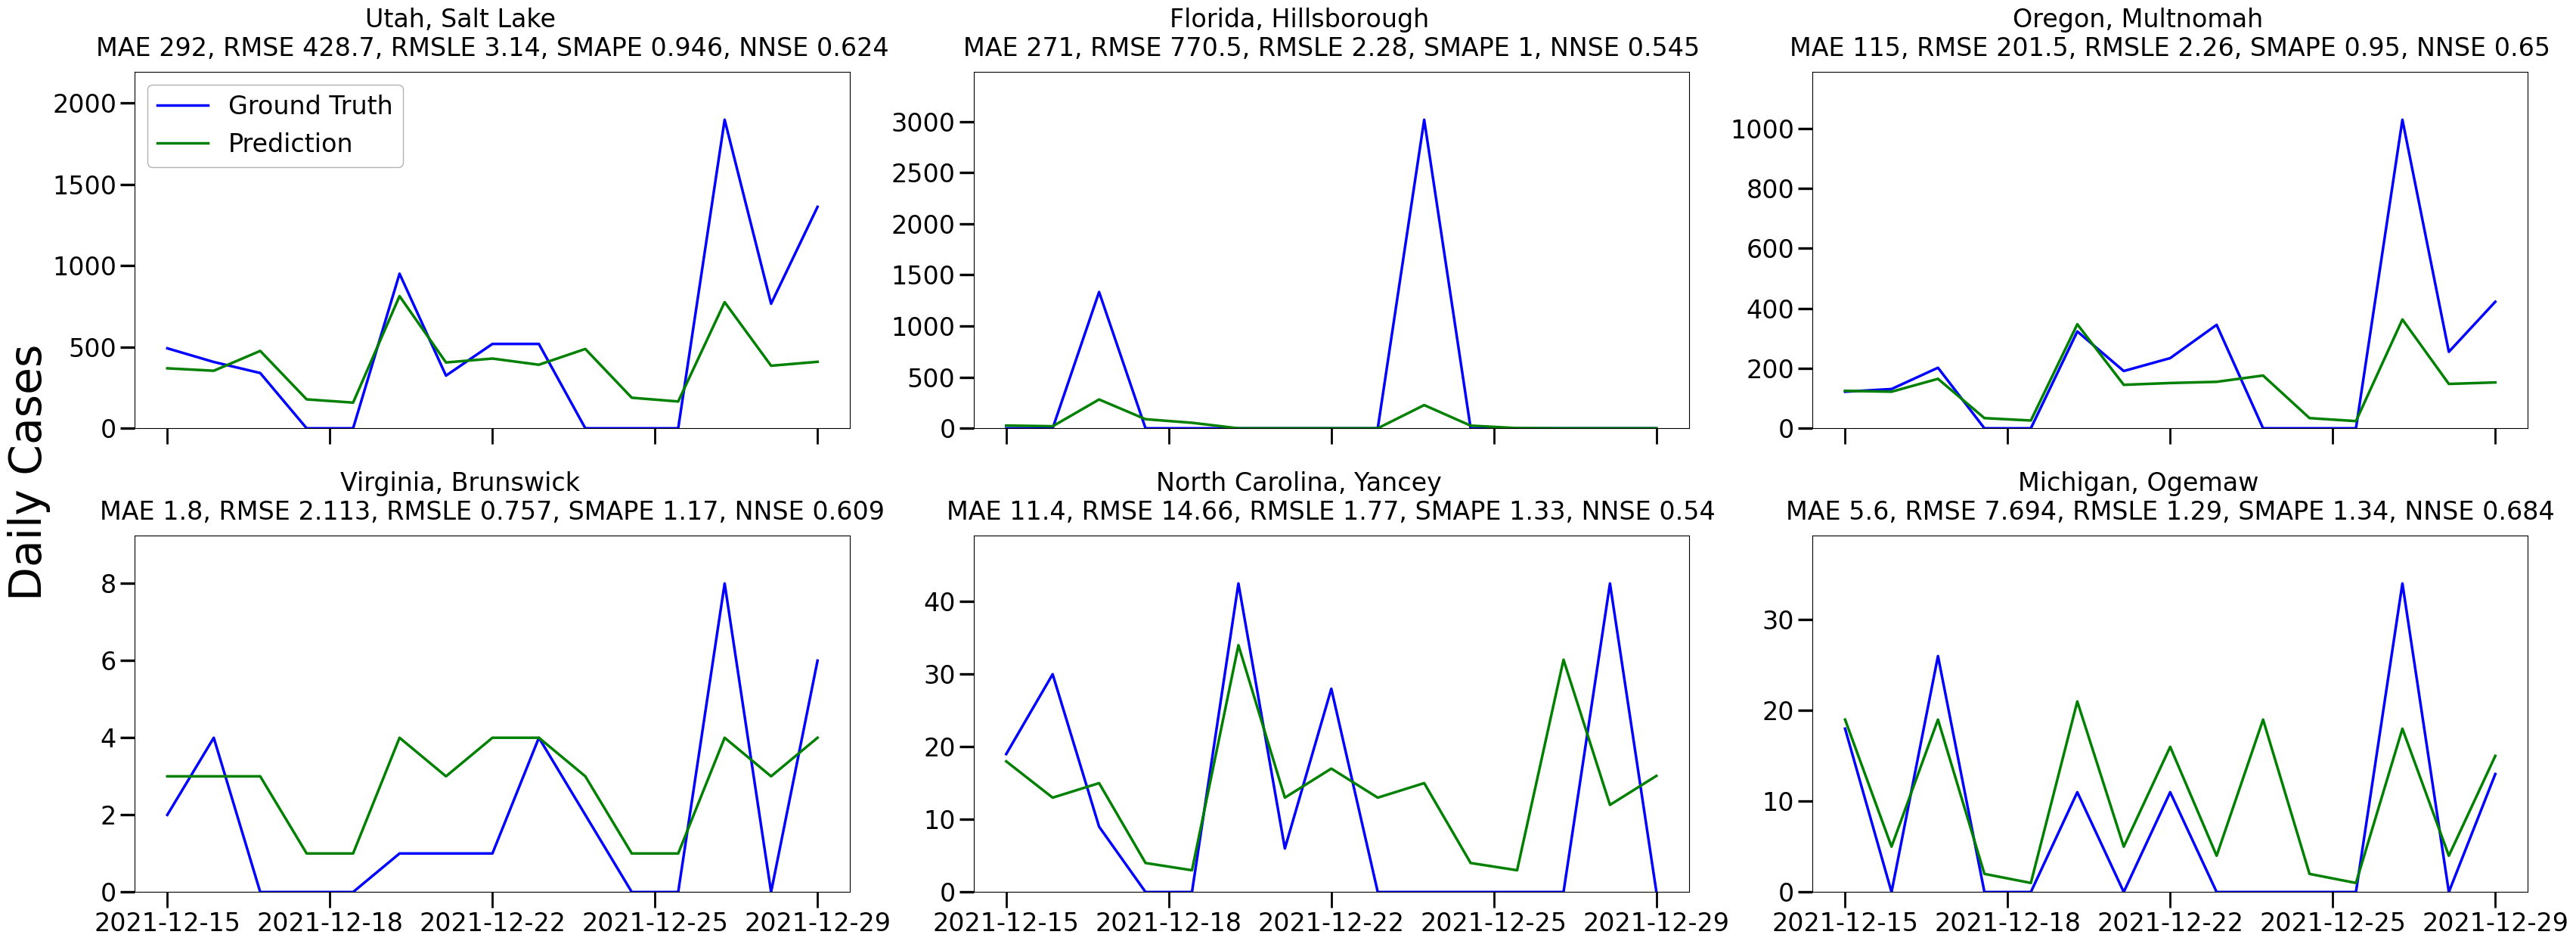

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(35, 13), sharex=True)
x_column = 'Date'

for index in range(6):
    row, col = index // 3, index%3
    ax = axes[row][col]

    fips = selected_fips[index]
    df = test[test['FIPS']==fips]
    county_name = population[population['FIPS']==fips]['Name'].values[0]
    mae, rmse, rmsle, smape, nnse = calculate_result(df[target], df[f'Predicted_{target}'])

    print(f'{index}: {county_name} ({(selected_population[index]/1e3).round(1)}K)')
    title = f'{county_name}\
        \nMAE {mae:0.3g}, RMSE {rmse:0.4g}, RMSLE {rmsle:0.3g}, SMAPE {smape:0.3g}, NNSE {nnse:0.3g}'

    ax.set_title(title)
    
    ax.plot(df[x_column], df[target], color='blue', label='Ground Truth')
    ax.plot(df[x_column], df[f'Predicted_{target}'], color='green', label='Prediction')

    _, y_max = ax.get_ylim()
    ax.set_ylim(0, y_max*1.1)

    x_first_tick = df[x_column].min()
    x_last_tick = df[x_column].max()
    x_major_ticks = DATE_TICKS
    ax.set_xticks(
        [x_first_tick + (x_last_tick - x_first_tick) * i / (x_major_ticks - 1) for i in range(x_major_ticks)]
    )

    # for tick in ax.get_xticklabels():
    #     tick.set_rotation(15)
    if y_max>5e3:
        label_text = [] 
        for loc in ax.get_yticks():
            if loc == 0:
                label_text.append('0')
            else:
                label_text.append(f'{loc/1e3:0.5g}K') 

        ax.set_yticklabels(label_text)
    
    if index==0:
        ax.legend(loc='upper left', framealpha=0.3, edgecolor="black")

# fig.legend(
#     labels=['Ground Truth', 'Prediction'], loc='upper left', bbox_to_anchor=(0.39, 0), 
#     ncol=2, bbox_transform=fig.transFigure, edgecolor="black"
# )
fig.supylabel('Daily Cases', x=0.02, fontsize=42)
fig.tight_layout() # might change y axis values
plt.savefig(os.path.join(figPath, 'Populous_counties.jpg'), dpi=DPI, bbox_inches="tight")
plt.show()

## Individual Plot

0: Utah, Salt Lake (1164.3K)


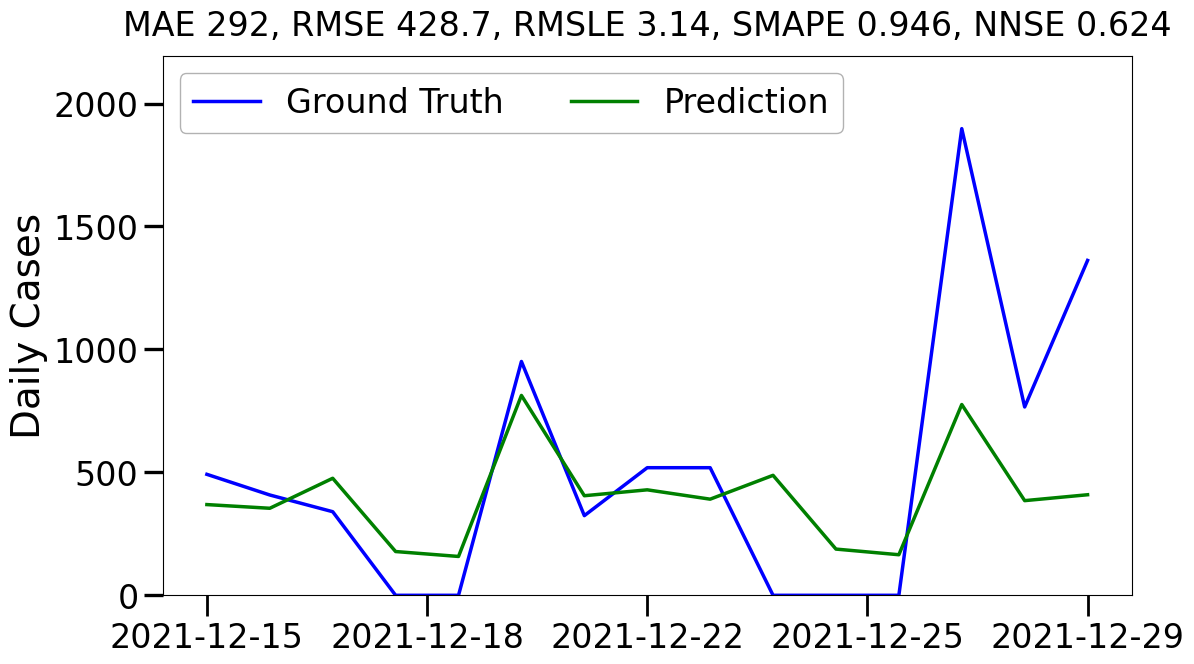

1: Florida, Hillsborough (1493.5K)


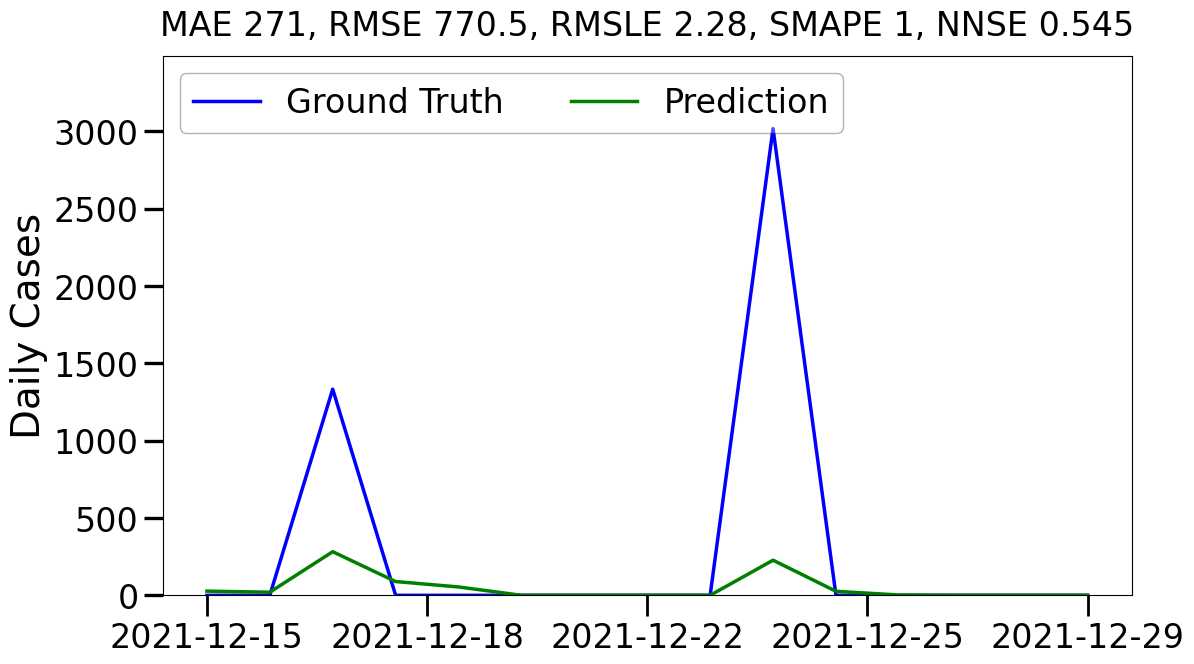

2: Oregon, Multnomah (815.2K)


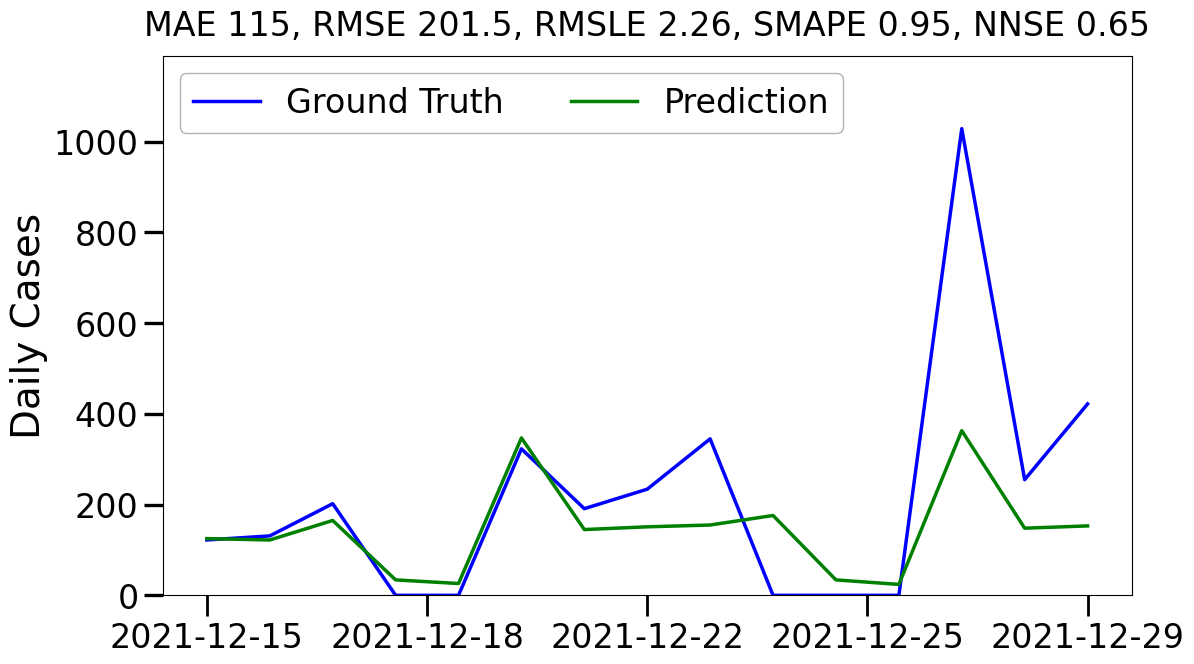

3: Virginia, Brunswick (16.1K)


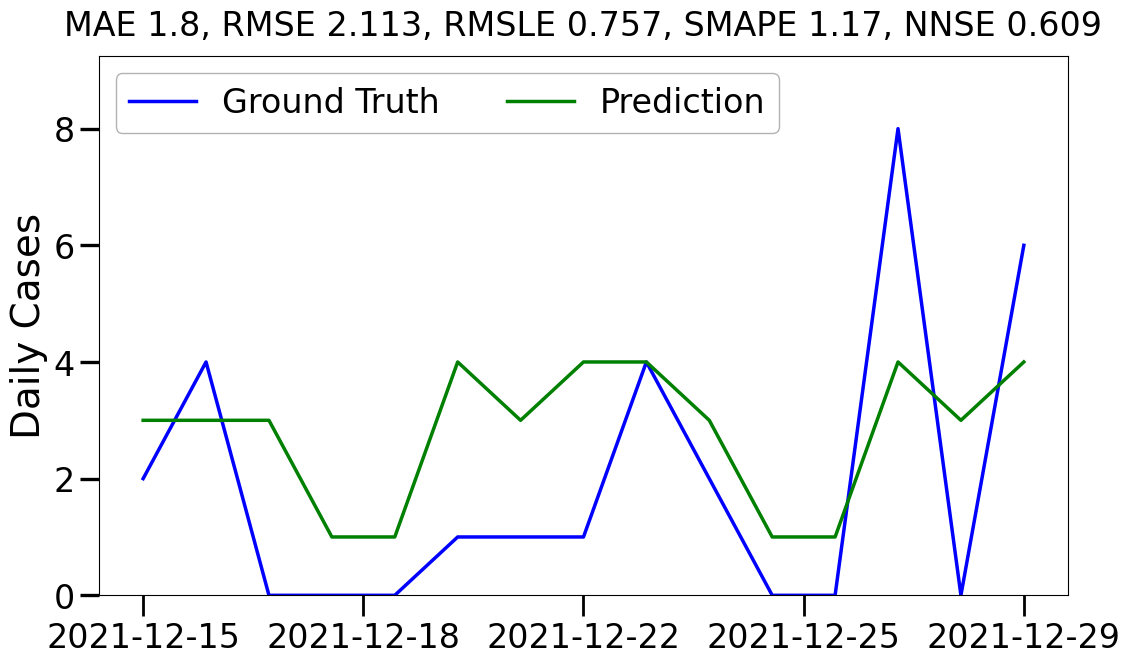

4: North Carolina, Yancey (18.1K)


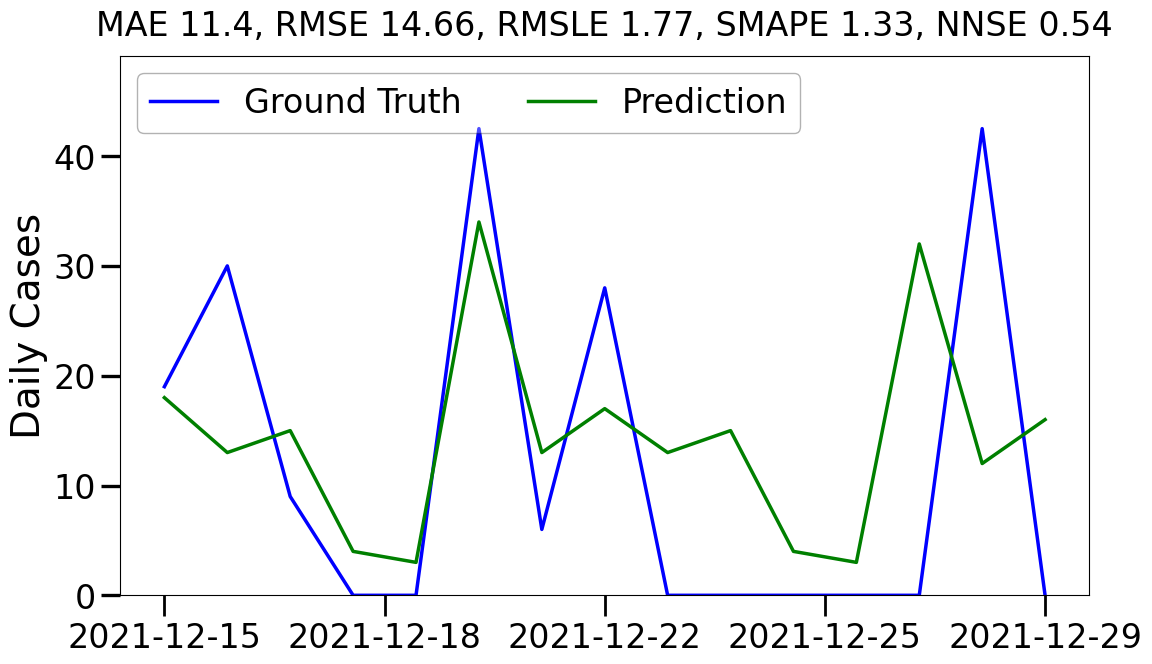

5: Michigan, Ogemaw (20.9K)


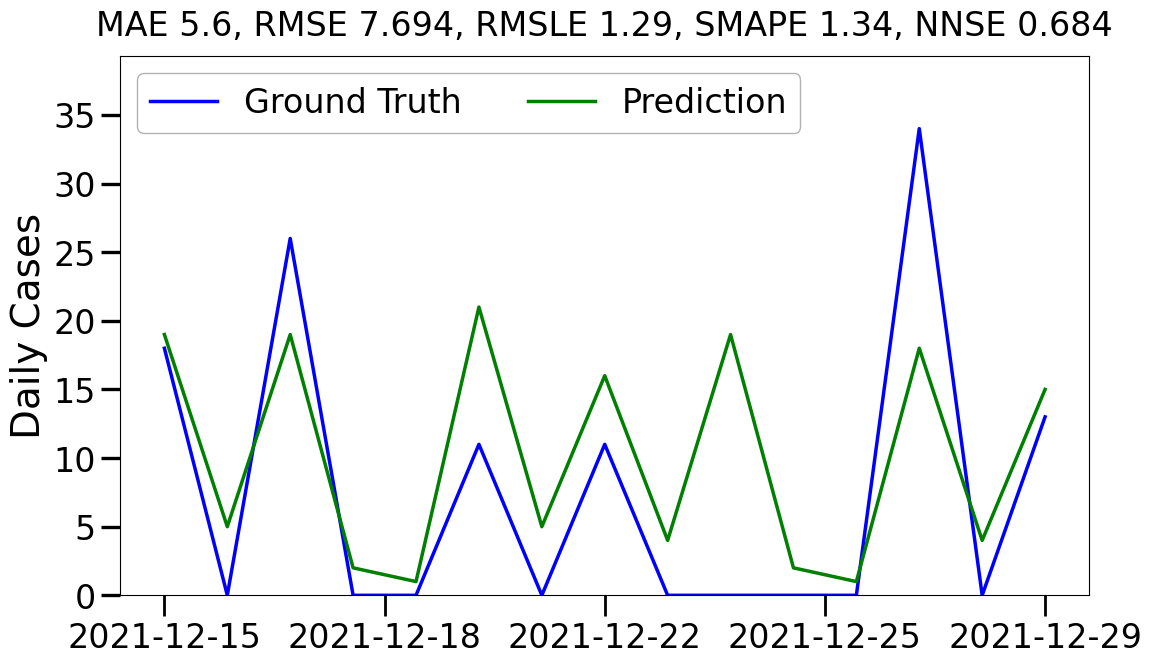

In [10]:
for index in range(6):
    fips = selected_fips[index]
    df = test[test['FIPS']==fips]
    county_name = population[population['FIPS']==fips]['Name'].values[0]
    mae, rmse, rmsle, smape, nnse = calculate_result(df[target], df[f'Predicted_{target}'])

    print(f'{index}: {county_name} ({(selected_population[index]/1e3).round(1)}K)')
    title = f'MAE {mae:0.3g}, RMSE {rmse:0.4g}, RMSLE {rmsle:0.3g}, SMAPE {smape:0.3g}, NNSE {nnse:0.3g}'

    plotter.plot(df, target, title, figure_name=f'{county_name}.jpg', legend_loc='upper left')

In [15]:
population[population['CTYNAME'].apply(lambda x: 'Kings County' in x)]

,STATE,COUNTY,FIPS,STNAME,CTYNAME,Name,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,UNDER5_MALE,UNDER5_FEM,AGE513_TOT,AGE513_MALE,AGE513_FEM,AGE1417_TOT,AGE1417_MALE,AGE1417_FEM,AGE1824_TOT,AGE1824_MALE,AGE1824_FEM,AGE16PLUS_TOT,AGE16PLUS_MALE,AGE16PLUS_FEM,AGE18PLUS_TOT,AGE18PLUS_MALE,AGE18PLUS_FEM,AGE1544_TOT,AGE1544_MALE,AGE1544_FEM,AGE2544_TOT,AGE2544_MALE,AGE2544_FEM,AGE4564_TOT,AGE4564_MALE,AGE4564_FEM,AGE65PLUS_TOT,AGE65PLUS_MALE,AGE65PLUS_FEM,AGE04_TOT,AGE04_MALE,AGE04_FEM,AGE59_TOT,AGE59_MALE,AGE59_FEM,AGE1014_TOT,AGE1014_MALE,AGE1014_FEM,AGE1519_TOT,AGE1519_MALE,AGE1519_FEM,AGE2024_TOT,AGE2024_MALE,AGE2024_FEM,AGE2529_TOT,AGE2529_MALE,AGE2529_FEM,AGE3034_TOT,AGE3034_MALE,AGE3034_FEM,AGE3539_TOT,AGE3539_MALE,AGE3539_FEM,AGE4044_TOT,AGE4044_MALE,AGE4044_FEM,AGE4549_TOT,AGE4549_MALE,AGE4549_FEM,AGE5054_TOT,AGE5054_MALE,AGE5054_FEM,AGE5559_TOT,AGE5559_MALE,AGE5559_FEM,AGE6064_TOT,AGE6064_MALE,AGE6064_FEM,AGE6569_TOT,AGE6569_MALE,AGE6569_FEM,AGE7074_TOT,AGE7074_MALE,AGE7074_FEM,AGE7579_TOT,AGE7579_MALE,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
201,6,31,6031,California,Kings County,"California, Kings",152804,84075,68729,11374,5817,5557,21177,10759,10418,8519,4331,4188,16457,9553,6904,115813,65237,50576,111734,63168,48566,70188,40994,29194,47456,28237,19219,31317,17645,13672,16504,7733,8771,11374,5817,5557,11740,5976,5764,11681,5910,5771,10271,5366,4905,12461,7391,5070,13420,7950,5470,12495,7406,5089,11567,6880,4687,9974,6001,3973,8795,5295,3500,8016,4681,3335,7791,4140,3651,6715,3529,3186,5332,2745,2587,4211,1970,2241,2921,1350,1571,2064,904,1160,1976,764,1212,32.1,32.4,31.7
1851,36,47,36047,New York,Kings County,"New York, Kings",2546958,1206077,1340881,180162,91943,88219,281436,144435,137001,113805,57699,56106,197669,95792,101877,2028009,940600,1087409,1971555,912000,1059555,1106687,536673,570014,824046,397772,426274,574282,263990,310292,375558,154446,221112,180162,91943,88219,164249,84330,79919,146020,74695,71325,132993,67417,65576,149648,71484,78164,231046,110181,120865,235722,115603,120119,194546,94169,100377,162732,77819,84913,148798,69465,79333,142375,65840,76535,144681,66216,78465,138428,62469,75959,117746,51814,65932,97021,41864,55157,62096,25068,37028,46806,18081,28725,51889,17619,34270,35.8,34.4,37.2
2399,46,77,46077,South Dakota,Kingsbury County,"South Dakota, Kingsbury",4976,2529,2447,345,164,181,580,289,291,246,141,105,330,166,164,3922,2009,1913,3805,1935,1870,1574,833,741,1059,557,502,1253,652,601,1163,560,603,345,164,181,330,172,158,311,148,163,274,156,118,241,120,121,271,149,122,251,136,115,259,130,129,278,142,136,230,122,108,245,121,124,397,193,204,381,216,165,360,189,171,270,147,123,195,92,103,141,74,67,197,58,139,43.5,43,44.1


0: California, Kings (152.8K)


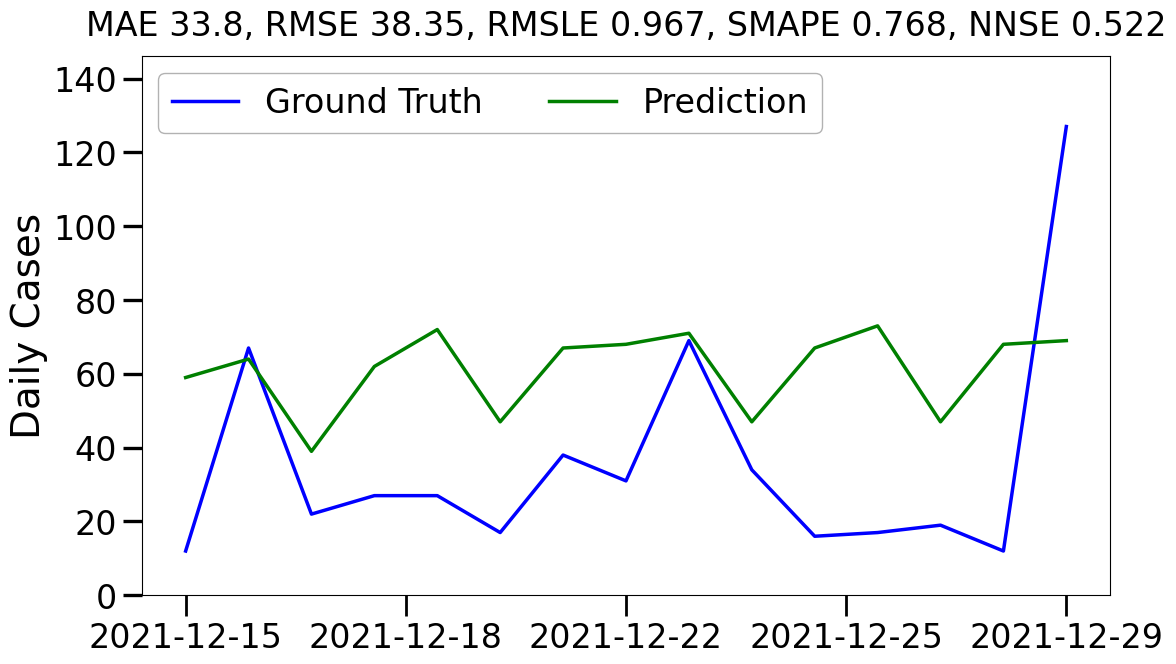

1: New York, Kings (2547.0K)


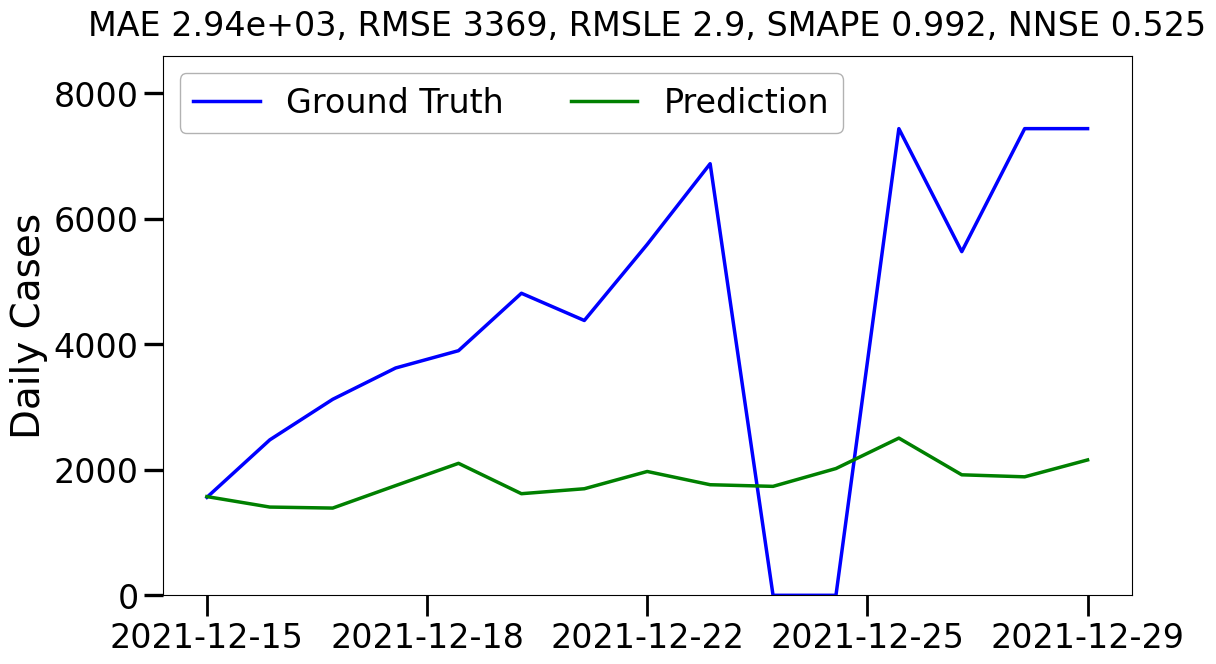

In [22]:
selected_fips = population[population['CTYNAME'].apply(lambda x: 'Kings County' in x)]['FIPS']

for index, fips in enumerate(selected_fips):
    df = test[test['FIPS']==fips]
    county_name = population[population['FIPS']==fips]['Name'].values[0]
    mae, rmse, rmsle, smape, nnse = calculate_result(df[target], df[f'Predicted_{target}'])
    population_count = population[population['FIPS']==fips]['POPESTIMATE'].values[0]

    print(f'{index}: {county_name} ({(population_count/1e3).round(1)}K)')
    title = f'MAE {mae:0.3g}, RMSE {rmse:0.4g}, RMSLE {rmsle:0.3g}, SMAPE {smape:0.3g}, NNSE {nnse:0.3g}'

    plotter.plot(df, target, title, figure_name=f'counties/{county_name}.jpg', legend_loc='upper left')